In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import integrated_gradients as ig
from metaplot import Metaplot
import tensorflow as tf
print(tf.version.GIT_VERSION, tf.version.VERSION)


def one_hot_encode(df, col='utr', seq_len=50):
    nuc_d = {'a':[1,0,0,0],'c':[0,1,0,0],'g':[0,0,1,0],'t':[0,0,0,1], 'n':[0,0,0,0]}
    vectors=np.empty([len(df),seq_len,4])
    
    for i,seq in enumerate(df[col].str[:seq_len]): 
        seq = seq.lower()
        a = np.array([nuc_d[x] for x in seq])
        vectors[i] = a
    return vectors

unknown 2.4.3


In [2]:
data = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/MRL_pred.csv', index_col = False)
mrl_model = tf.keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/seelig/Supplementary Code/modeling/saved_models/main_MRL_model.hdf5')

seq = one_hot_encode(data, seq_len = 50)
ind = data.index
dummy = seq[1]


2022-03-22 09:45:45.608199: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


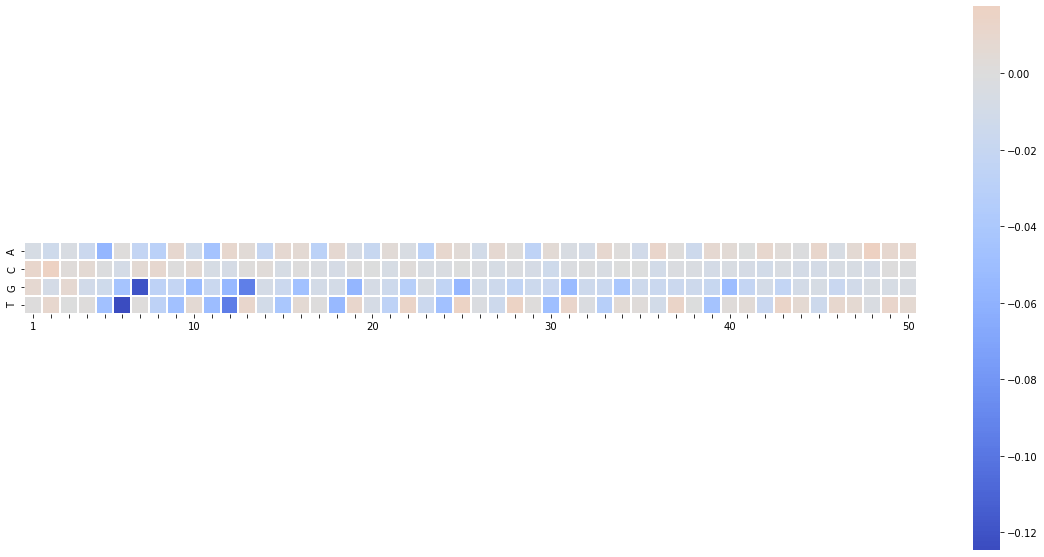

In [3]:
ex = ig.integrated_gradients(mrl_model, seq[:200])
Metaplot(ex, True)

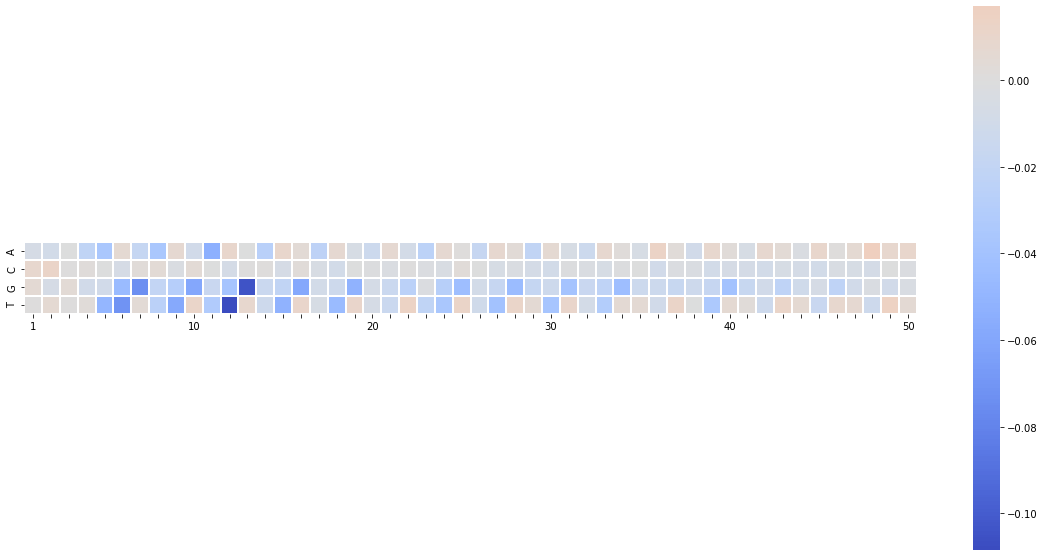

In [4]:
ex1 = ig.integrated_gradients(mrl_model, seq[:400])
Metaplot(ex1, True)

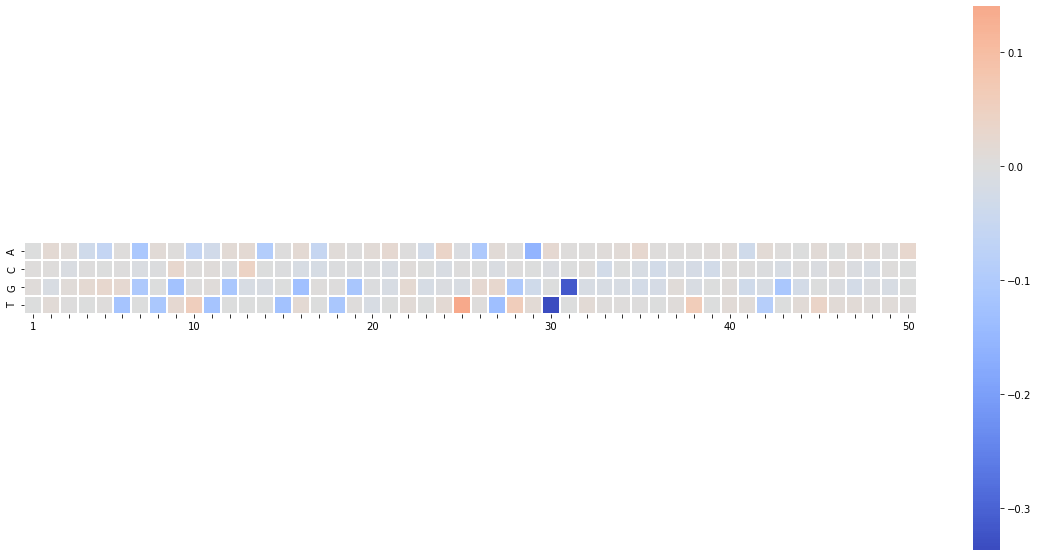

In [5]:
ex2 = ig.integrated_gradients(mrl_model, seq[:10])
Metaplot(ex2, True)

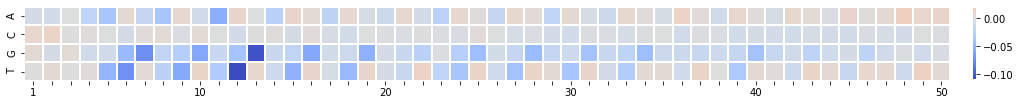

In [17]:
from sklearn.preprocessing import MinMaxScaler

counter = 0
dim = ex1.shape[1:]
meta1 = np.zeros(dim)
for i in ex1:
    meta1 = np.add(meta1,i)
    counter += 1
meta1 = np.transpose((meta1/counter))


xlabel_list =   [1, None, None, None, None, None, None, None, None, 10,
                    None, None, None, None, None, None, None, None, None, 20,
                    None, None, None, None, None, None, None, None, None, 30,
                    None, None, None, None, None, None, None, None, None, 40,
                    None, None, None, None, None, None, None, None, None, 50]

ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(data = meta1, linewidths=.1, cmap = 'coolwarm', center = 0, yticklabels = ['A', 'C', 'G', 'T'], xticklabels = xlabel_list, cbar = True, cbar_kws = {'shrink': .13, 'pad':0.02}, square = True)
plt.show(ax)

In [17]:
counter=0
dim = ex1.shape[1:]
meta = np.zeros(dim)
for i in ex1:
    meta = np.add(meta,i)
    counter+=1

meta = meta/counter
MinMaxScaler(feature_range=(-1,1)).fit_transform(meta)

meta

array([[-6.76824669e-03,  8.99764222e-03,  5.72724416e-03,
         1.20229233e-04],
       [-8.64338525e-03,  1.20647228e-02, -6.92883326e-03,
         6.72096556e-03],
       [-2.85624130e-04,  6.83124857e-04,  4.37715697e-03,
         1.55723508e-04],
       [-2.12355570e-02,  1.76808663e-03, -9.50490971e-03,
         2.44664393e-03],
       [-3.57676648e-02, -1.05882104e-03, -1.01502909e-02,
        -5.00590612e-02],
       [ 6.74105054e-03, -6.13619447e-03, -4.61643332e-02,
        -7.12893636e-02],
       [-1.78358923e-02,  3.13115309e-03, -7.40036424e-02,
         4.23560809e-03],
       [-3.62895964e-02,  4.76875820e-03, -1.98952601e-02,
        -2.55445994e-02],
       [ 7.06753512e-03, -3.45778988e-03, -2.80709200e-02,
        -5.76535206e-02],
       [-9.82855976e-03,  3.81030495e-03, -5.96690088e-02,
         1.15428217e-02],
       [-5.36679086e-02, -9.84901768e-04, -1.58953258e-02,
        -3.22263156e-02],
       [ 9.25263123e-03, -7.36416340e-03, -3.86330345e-02,
      

In [15]:

dim = ex1.shape[1:]
meta2 = np.zeros(dim)
for i in ex1:
    meta2 = np.add(meta2,i)

#MinMaxScaler(feature_range=(-1,1)).fit_transform(meta)

meta2

array([[-2.70729868e+00,  3.59905689e+00,  2.29089766e+00,
         4.80916931e-02],
       [-3.45735410e+00,  4.82588911e+00, -2.77153331e+00,
         2.68838622e+00],
       [-1.14249652e-01,  2.73249943e-01,  1.75086279e+00,
         6.22894032e-02],
       [-8.49422278e+00,  7.07234652e-01, -3.80196388e+00,
         9.78657572e-01],
       [-1.43070659e+01, -4.23528417e-01, -4.06011636e+00,
        -2.00236245e+01],
       [ 2.69642022e+00, -2.45447779e+00, -1.84657333e+01,
        -2.85157454e+01],
       [-7.13435692e+00,  1.25246124e+00, -2.96014570e+01,
         1.69424324e+00],
       [-1.45158386e+01,  1.90750328e+00, -7.95810403e+00,
        -1.02178398e+01],
       [ 2.82701405e+00, -1.38311595e+00, -1.12283680e+01,
        -2.30614083e+01],
       [-3.93142391e+00,  1.52412198e+00, -2.38676035e+01,
         4.61712869e+00],
       [-2.14671634e+01, -3.93960707e-01, -6.35813033e+00,
        -1.28905262e+01],
       [ 3.70105249e+00, -2.94566536e+00, -1.54532138e+01,
      

In [12]:
(seq[-1:])

array([[[0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0.5],
        [0. , 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0.5],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0.5, 0. , 0. ],
        [0. , 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. ],
        [0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0.5],
        [0. , 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0.5, 0. , 0. ],
        [0